# Mid Term : Foundation Machine Learning 



### Choose one of the data sets provided in the Project.pdf 


### I chose the "Wine Quality Data Set" 

The data set contains entries related to attributes of red-wines 

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 3 and 8 )



### Expectation
#### 1. Understanding and explaining the data set. 
#### 2. Processing data, cleaning up.
#### 3. Dividing your data into a training and test set.
#### 4. Choosing the relevant algorithm.
#### 5. Writing a python code to perform learning. (You can reuse every code from the lectures)
#### 6. Evaluating your learning performance.
#### 7. Making sure your results does not depend on your choosing parameters.






### In section 1 and 2 , we are going to import ,  process and clean up our data, identify data anomalies or attributes and analyze how the variables are related to each other 

In [217]:
import pandas as pd
import numpy as np 
import random 
import matplotlib.pyplot as plt

wine_data = pd.read_csv(r'C:\temp\winequality-red.csv', 
                        names=['Fixed_Acidity', 
                               'Volatile_Acidity', 
                               'Citric_Acid', 
                               'Residual_Sugar', 
                               'Chlorides', 
                               'Free_Sulfur_Dioxide', 
                               'Total_Sulfur_Dioxide', 
                               'Density', 
                               'pH', 
                               'Sulphates', 
                               'Alcohol', 
                               'Quality'
                              ],
                        skiprows=1,
                        sep=r'\s*;\s*', engine='python')


### First, we are going to check for nulls and duplicates. 

In [218]:
extra = wine_data[wine_data.duplicated()]
print("These are the duplicate records in the data set",extra.shape)

These are the duplicate records in the data set (240, 12)


Mathematically it is common to assume points with identical features to be the same point. 
But it is not clear to that these duplicates data points aren't the result of different tasters or someliers... 

Because if they are actually different entries, they may differ in some other attributes not present in the data set. 

So for now I am going to keep them


Then, we will look into the nulls 

In [219]:
nulls=wine_data.isnull().sum()
print("The number of nulls per feature is", '\n')
print(nulls)

The number of nulls per feature is 

Fixed_Acidity           0
Volatile_Acidity        0
Citric_Acid             0
Residual_Sugar          0
Chlorides               0
Free_Sulfur_Dioxide     0
Total_Sulfur_Dioxide    0
Density                 0
pH                      0
Sulphates               0
Alcohol                 0
Quality                 0
dtype: int64


Lets also look at how many different entries we have for each Quality Label 

In [220]:
wine_counts=wine_data['Quality'].value_counts() 
wine_counts.sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: Quality, dtype: int64

So it looks like we have many wines falling in the middle categories and very few wines in the really "bad" or "really" good wines. 

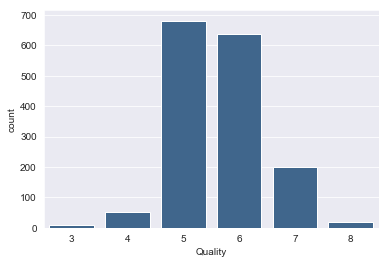

In [221]:
sns.set_style('darkgrid')
sns.countplot(x='Quality', data=wine_data,color=(0.2, 0.4, 0.6, 0.6))

Minimum quality is 3 and maximum quality is 8. 

Looking at how the data is distributed, unless the correlation between variables that determines the quality is very strong, We can anticipate that the prediction of new data into 6 categories is probably not going to be very accurate, 

Maybe down the road, we can create group the 6 categories of wine into 2 qualities - Simply "Good" or "Bad" 

if Quality <=5 - bad 
if Quality >5 -good


However, looking at the data, most of the wines are categorized into the "average" central categories of 5 and 6. So maybe we can create 3 wine quality categories namely "poor", "normal", "excellent" and accomodate the data into those. 

if Quality < 5 - poor 
if Quality = 5 or 6 - normal 
if Quality > 6 - excellent 




Ok, so now that we know that we don't have nulls and our data is clean, we can proceed with describing the features and understand relationships between variables 

In [222]:
wine_data.describe()

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Let's also look at the correlation between the variables 

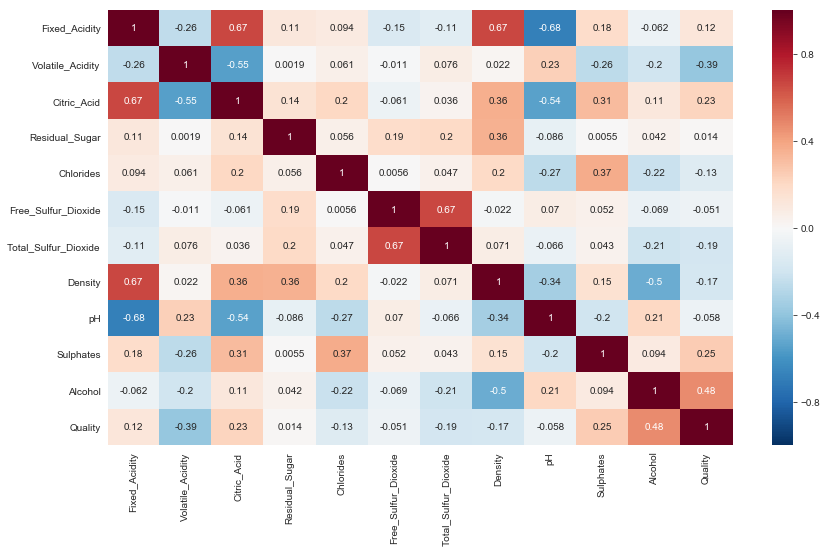

In [223]:
import seaborn as sns

correlation = wine_data.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1,cmap="RdBu_r")
#cmap="RdBu_r"

From the previous map. 

We can see some corelations but in general none of the features are very highly correlated. 

Corr(X,X) = 1 as expected. 

Fixed Acidity vs. Density (67%)

Free Sulfur Dioxide vs. Total Sulfur Dioxide (67%)

Also , the PH vs Fixed Acidity (-68% )and Citrix acid (-54%) are inversely related 





In regards to the Quality, let's plot some charts to see the impact of some variable in the quality 

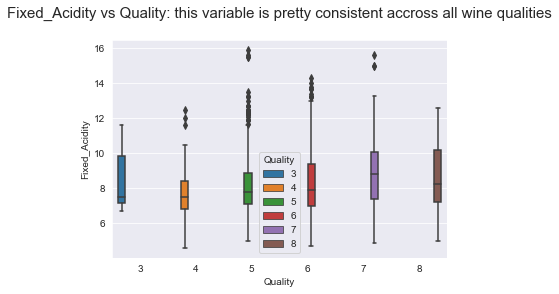

In [224]:
sns.boxplot(y='Fixed_Acidity', x='Quality', data=wine_data, hue='Quality')

plt.title("Fixed_Acidity vs Quality: this variable is pretty consistent accross all wine qualities\n", fontsize=15)
plt.show()


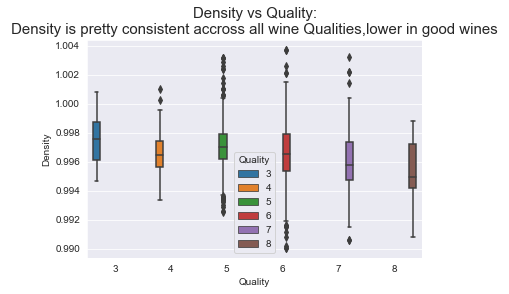

In [225]:
sns.boxplot(y='Density', x='Quality', data=wine_data, hue='Quality')
plt.title("Density vs Quality:\n Density is pretty consistent accross all wine Qualities,lower in good wines ", fontsize=15)
plt.show()

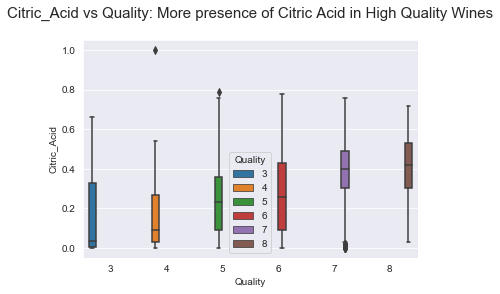

In [226]:
sns.boxplot(y='Citric_Acid', x='Quality', data=wine_data, hue='Quality')
plt.title("Citric_Acid vs Quality: More presence of Citric Acid in High Quality Wines\n", fontsize=15)
plt.show()

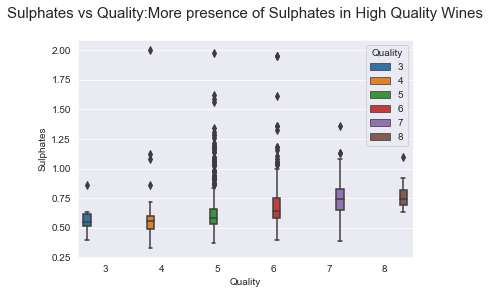

In [227]:
sns.boxplot(y='Sulphates', x='Quality', data=wine_data, hue='Quality')
plt.title("Sulphates vs Quality:More presence of Sulphates in High Quality Wines\n",fontsize=15)
plt.show()

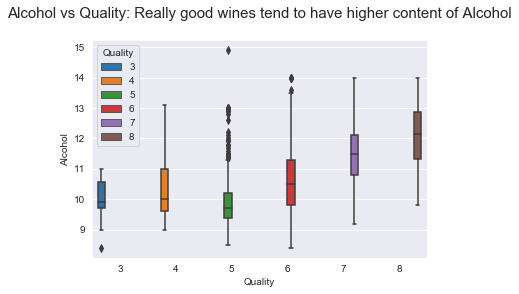

In [270]:
sns.boxplot(y='Alcohol', x='Quality', data=wine_data, hue='Quality')
plt.title("Alcohol vs Quality: Really good wines tend to have higher content of Alcohol\n", fontsize=15)
plt.show()

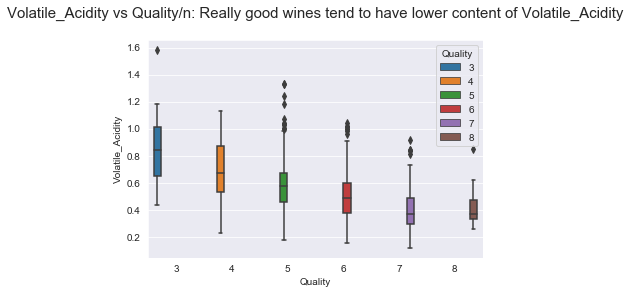

In [271]:
sns.boxplot(y='Volatile_Acidity', x='Quality', data=wine_data, hue='Quality')
plt.title("Volatile_Acidity vs Quality/n: Really good wines tend to have lower content of Volatile_Acidity\n", fontsize=15)
plt.show()

### The next thing we do is drop the Feature that we want to predict . 

### In this case, Quality of the Wine 

In [229]:
X = wine_data.drop('Quality', 1)
y = wine_data['Quality']

In [230]:
X.values

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [231]:
y.values

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [232]:
print("Quality Values in the Data set =",set(y.values))

Quality Values in the Data set = {3, 4, 5, 6, 7, 8}


### Based on this data, we are going to write/Implement some algorithms that will predict, given the rest of the features in the data set, what is the quality of our wine. 


#### The steps we are going to take  :

#### 1. K-Nearest Neighbord based on the code from the lectures 
#### 2. K-Nearest Neighbord based on scikit-learn package
#### 3. We will compare both results and draw some conclusions. 
#### 4. Later, we will repeat the steps reducing the number of categories from 6 to 2 or 3 categories. 


#### 5. As final step, we will try more algorithms from the scikit-learn and compare the acuracy of the predictions based on 2 or 3 categories





### Why did I choose to start with K-Nearest Neighbor ? 

#### The KNN is a non-parametric method used for classification and regression.It looks at the K-points in the training set that are nearest to the test input X, counts how many members of each class are in the set and retunrs the empirical fraction as the estimate. 


#### Non-parametric	means	that	it	does	not	make	any	 assumptions	on	the	underlying	data	distribution.	In	other	words,	the	model	structure	is	determined	from	the	data.


#### Advantages of this method : 
 High Accuracy, Insensitive to outliers, no assumptions about data
#### Disadvantages :
Computationally expensive and it doesnt work well with high dimensional inputs. This is due to the curse of dimensionality 

#### The algorithm works with numeric or nominal values. 

### Based on the code from the lectures 

First we are gonig to create some classes and functions 

In [233]:
def Minkowski_d(x1, x2, p=2):
    """ Function from L^p
    This is a function for defining a general distance measure between any 
    given N-dimensional vectors:     x1, x2
    
    INPUT:
    ------
           x1 (list or array of floats) : First vector
           x2 (list or array of floats) : Second vector
           p (float) : The power in our Minkowski definition 
    
    OUTPUT:
    -------
            (float) : The Minkowski distance of power p
                      between x1 and x2 
    """
    
    # Assuming we have a list or an array of numbers
    # Creating a variable for summation
    _sum_=0
    # Now we go through every element on the arrays and
    # will find the distance and add them  
    for x1_, x2_ in zip(x1, x2):
        dummy = pow(abs(x1_-x2_), p)
        _sum_+=dummy
    distance = pow(_sum_, 1/p)
    return distance

In [234]:
class Point:
    def __init__(self, features, label = None, \
                 name = "Unassigned"):
        self.name = name
        self.features = features
        self.label = label
        
    # get the dimensionality of the features
    def get_dimension(self):
        return len(self.features)
    
    def get_features(self):
        return self.features
    
    def get_label(self):
        return self.label
    
    def get_name(self):
        return self.name
    
    def distance_Minkowski(self, other, p = 2):
        return Minkowski_d(self.features, other.get_features(), p)
    distance_Minkowski.__doc__ = Minkowski_d.__doc__
    
    def get_norm(self, p = 2):
        _zero_=[0 for _ in range(self.get_dimension())]
        return Minkowski_d(self.features, _zero_, p)
    
    def __str__(self):
        return self.name +" : "+ str(self.features) + ' : '\
               + str(self.label)

In [235]:
def K_Nearest_Neighbours(new_point, points, k, verbose = False):
    distances = []
    
    for point in points:
        distances.append((point.distance_Minkowski(new_point), point))
    
    sorted_by_distance = sorted(distances, key= lambda x : x[0])
        
    k_neighbours = [sorted_by_distance[i][1] for i in range(k)]
    
    if verbose:
        print([sorted_by_distance[i][0] for i in range(k)])
    
    k_neighbours_labels = [k_neighbours[i].get_label() for i in range(k)]
    most_frequent_label = max(set(k_neighbours_labels), key=k_neighbours_labels.count)
    
    new_point_copy = Point(new_point.get_features(), label = most_frequent_label)
    
    if verbose:
        print(k_neighbours_labels)
    
    return most_frequent_label, new_point_copy

In [236]:
def run_test(test_data, training_data, k):
    updated_test_data = []
    
    truely_assigned = 0
    
    for point in test_data:
        _label_, new = K_Nearest_Neighbours(point, training_data, k)
        updated_test_data.append(new)
        
        if new.get_label() == point.get_label():
            truely_assigned+=1
        
    
    return updated_test_data, truely_assigned/len(test_data)

In [237]:
def devide_dataset(_data_, training_fraction = 0.8, seed = random.randint(1,100000)):
    """
    This is a general function to devide a given dataset into 
    training set and test set.
    
    
    INPUT:
    ------
           _data_ (list or an array) : contains data 
           training_fraction (float) : what fraction of data goes
                                       to training set.
                                       
    OUTPUT:
    ------
           training_dataset (list) : contains the training data
           test_dataset (list) : contains the test data
           
           
    """
    _len_ = len(_data_)+1
    _number_of_data_in_training_ = int(round(training_fraction*_len_))

    random.seed(seed)
    sample_indices = random.sample(range(len(_data_)), _number_of_data_in_training_)
    
    test_dataset = []
    training_dataset = []
    
    for i, point in enumerate(_data_):
        if i in sample_indices:
            training_dataset.append(point)
            
        else:
            test_dataset.append(point)
            
    return training_dataset, test_dataset

### Define the points for our KNN Algorithm

In [238]:

original_data_points = []

for i in range(0,len(X.values)):
    _p_ = Point(X.values[i], label = y.values[i], name=str(i))
    original_data_points.append(_p_)

In [239]:
len(original_data_points)

1599

Testing the algorithm with some new data: 

If we feed the KNN algorithm with a new data entry, the algorithm should return the 5 nearest neighboors with the predicted labels ( quality ) for each one . 



In [240]:
new_point = Point([ 7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5])
_label_, _updated_point_ = K_Nearest_Neighbours(new_point, original_data_points, 5, True)

[0.0, 1.3446520590844309, 1.500538023510234, 1.531791774360993, 1.7162754557471245]
[7, 5, 5, 5, 5]


It works !!! 

Now, lets generalize and apply the algorithm to all the the training set 

In [243]:
#from time import time
#ti=time()
K = 5
tr_our_KNN = np.linspace(0.05, 0.9, 30)

accuracy_our_KNN =np.zeros(len(tr_our_KNN))

for i, _t_ in enumerate(tr_our_KNN):
    training, test = devide_dataset(original_data_points, training_fraction=_t_)
    assigned_test_data, accuracy_our_KNN[i] = run_test(test, training, K)
    
#tf=time()-ti


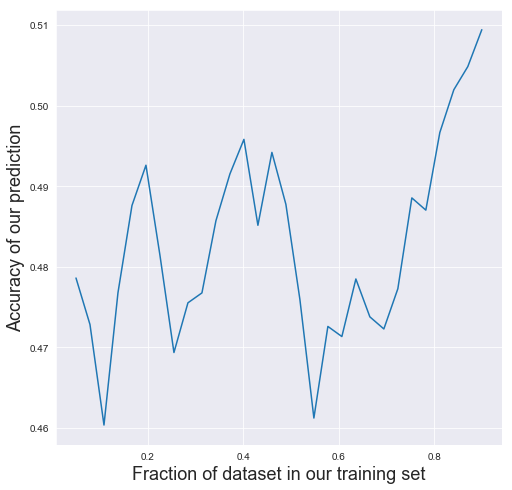

In [245]:
fig_training_frac_accuracy = plt.figure(figsize=(8, 8))

plt.plot(tr_our_KNN, accuracy_our_KNN)

plt.xlabel(r"Fraction of dataset in our training set", fontsize = 18)
plt.ylabel(r"Accuracy of our prediction", fontsize = 18)

plt.show()

What we can see here is that our prediction is not very accurate but improves with more training data ( over 70% ) 

If we consider that the sample includes 6 different quality types and there aren't many "good ones" or "bad ones", predicting accurately those categories given how the variables are not highly correlated to each quality is a little challenging. 

Lets see what we can do about that 



### Let's use scikit-learn for performing the same KNN algorithm, first, we are going to scale the data 

In [246]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X.values, y.values, test_size=0.5, random_state=1000
)

Many techniques have sentitivy to 
the scale of the data and when performing KNN, we need some notion of distance between points. 

For this reason, when dimensions aren't comparable with one another, we need to rescale our data so that each dimension has a mean of 0 and a standard deviation of 1. 

In [247]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.5, random_state=1000)

In [248]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [249]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [250]:
KNN.score(X_test, y_test)

0.5675

### Lets generalize for all training sets and compare accuracy for both implementations 

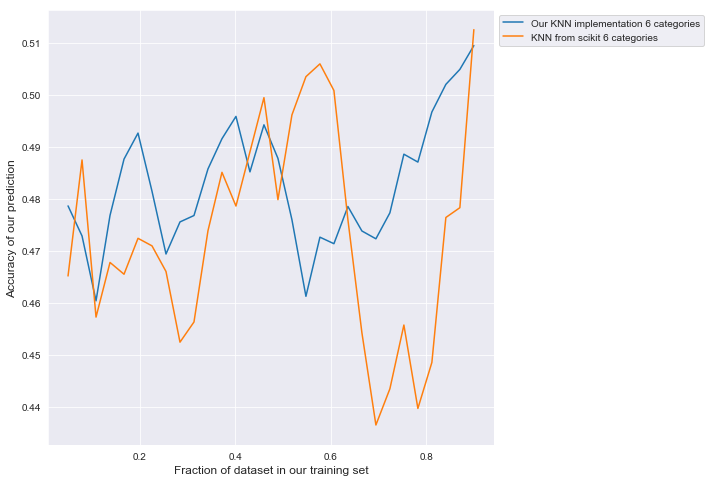

In [251]:


tr_sci_KNN = np.linspace(0.05, 0.9, 30)
accuracy_sci_6 = np.zeros(len(tr_sci_KNN))

for i, _f_ in enumerate(tr_sci_KNN):
    X_train, X_test, y_train, y_test = train_test_split(
    X.values, y.values, test_size=1-_f_, random_state=150
    )
    KNN = KNeighborsClassifier(n_neighbors=5)
    KNN.fit(X_train, y_train)
    
    accuracy_sci_6[i] = KNN.score(X_test, y_test)
    
fig_training_frac_accuracy = plt.figure(figsize=(8, 8))


plt.plot(tr_our_KNN, accuracy_our_KNN,label="Our KNN implementation 6 categories")
plt.plot(tr_sci_KNN, accuracy_sci_6, label="KNN from scikit 6 categories")
    

plt.ylabel(r"Accuracy of our prediction", fontsize = 12)
plt.xlabel(r"Fraction of dataset in our training set", fontsize = 12)

plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)
plt.show()

### Hum, it looks like for training sets up to 50%, both implementations would provide pretty similar accuracy, however scikit does a little worse and then recovers after 70% 


#### What if we predict 2 categories ( good wine and bad wine ) instead of 6 

In [252]:
#### first let's create 2 buckets for qualities - good=0 or bad=1
y1 = (y > 5).astype(int)
set(y1)

{0, 1}

In [253]:
seed = 8 
X_train, X_test, y_2_train, y_2_test = train_test_split(X, y1, test_size=0.5,random_state=seed)

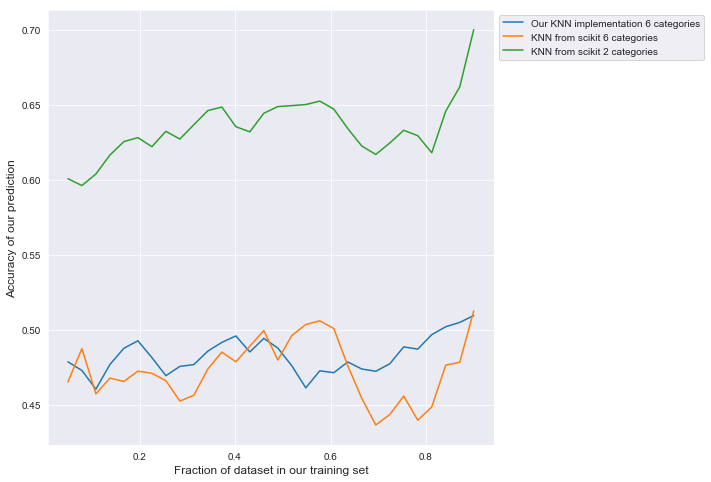

In [254]:


tr_sci_KNN2 = np.linspace(0.05, 0.9, 30)
accuracy_sci_2 = np.zeros(len(tr_sci_KNN2))

for i, _f_ in enumerate(tr_sci_KNN2):
    X_train, X_test, y_2_train, y_2_test = train_test_split(
    X.values, y1.values, test_size=1-_f_, random_state=150
    )
    KNN = KNeighborsClassifier(n_neighbors=5)
    KNN.fit(X_train, y_2_train)
    
    accuracy_sci_2[i] = KNN.score(X_test, y_2_test)
    
fig_training_frac_accuracy = plt.figure(figsize=(8, 8))


plt.plot(tr_our_KNN, accuracy_our_KNN,label="Our KNN implementation 6 categories")
plt.plot(tr_sci_KNN, accuracy_sci_6, label="KNN from scikit 6 categories")
plt.plot(tr_sci_KNN2, accuracy_sci_2, label="KNN from scikit 2 categories")
    

plt.ylabel(r"Accuracy of our prediction", fontsize = 12)
plt.xlabel(r"Fraction of dataset in our training set", fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)


plt.show()

#### As expected, when we reduce the number of qualities to simply "Good" or "Bad"... the chance of predicting it right improves. However, it doesnt look like the KNN algorithm is working out that good to label the data into 2 categories. 


#### What if we predict 3 categories 

Namely "poor", "normal", "excellent".

if Quality < 5 - poor 
if Quality = 5 or 6 - normal 
if Quality > 6 - excellent 


In [255]:
def classify_wine_quality(Quality):
    if Quality < 5:
        return 'Poor'
    elif Quality ==5 or Quality ==6:
        return 'Normal'
    else:
        return 'Excellent'
    
wine_data['3Qualities'] = wine_data['Quality'].apply(classify_wine_quality)

In [256]:
set(wine_data['3Qualities'])

{'Excellent', 'Normal', 'Poor'}

In [257]:
#use LabelEncoder for the categorigal values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
wine_data['3Qualities'] = le.fit_transform(wine_data['3Qualities'])
wine_data['3Qualities'].dtypes
set(wine_data['3Qualities'])

{0, 1, 2}

In [258]:
y3 = wine_data['3Qualities']
set(y3)

{0, 1, 2}


#### Now, Ok, now that we have our 3 categories in numerical values, Lets compare our predictions based on 3 categories 



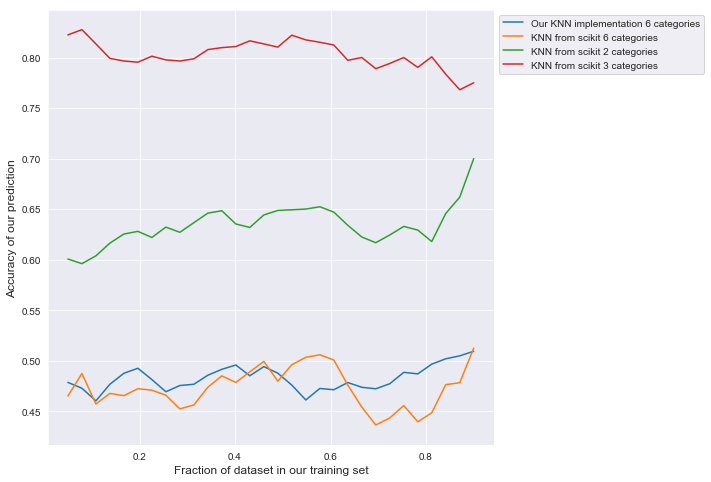

In [259]:

tr_sci_KNN3 = np.linspace(0.05, 0.9, 30)
accuracy_sci_3 = np.zeros(len(tr_sci_KNN3))

for i, _f_ in enumerate(tr_sci_KNN3):
    X_train, X_test, y_3_train, y_3_test = train_test_split(
    X.values, y3.values, test_size=1-_f_, random_state=150
    )
    KNN = KNeighborsClassifier(n_neighbors=5)
    KNN.fit(X_train, y_3_train)
    
    accuracy_sci_3[i] = KNN.score(X_test, y_3_test)
    
fig_training_frac_accuracy = plt.figure(figsize=(8, 8))


plt.plot(tr_our_KNN, accuracy_our_KNN,label="Our KNN implementation 6 categories")
plt.plot(tr_sci_KNN, accuracy_sci_6, label="KNN from scikit 6 categories")
plt.plot(tr_sci_KNN2, accuracy_sci_2, label="KNN from scikit 2 categories")
plt.plot(tr_sci_KNN3, accuracy_sci_3, label="KNN from scikit 3 categories")
        

plt.ylabel(r"Accuracy of our prediction", fontsize = 12)
plt.xlabel(r"Fraction of dataset in our training set", fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)


plt.show()

#### Well, it seems like the categorization of 3 types of wine is more aligned with the original wine quality distribution

#### KNN model is always over 75% right when choosing between 3 categories, and it represents a substantial gap compared to the accuracy when choosing 2 categories. 







#### Now, let's include other algorithms from scikit-learn so we can compare accuracy between the models for the 3 categories of data "Poor", "Normal" and "Excellent"



#### I chose Logistic Regression and Ranfom Forest classifier so we can see which one performs better with our data set 

#### Logistic Regression
    
Regression	can	be	defined	as	the	relation	between	a	
dependent	variable,	y,	and	a	set	of	independent	
variables,	x,	that	describes	the	expectation	value	of	y	
given	x:	E[y|x].		

In the case of response	Y that are discrete,	the	straight	line	is	
no	longer	a	fit. Logistic	Regression	is	the	process	of	obtaining	an	
appropriate	non-linear	curve	to	fit	the	data	when	the	
target	variable	is	discrete

#### Random Forest 
Random	forest	builds	multiple	decision	
trees	(called	the	forest)	and	glues	them	together	to	get	a	
more	accurate	and	stable	prediction.	The	forest	it	builds	
is	a	collection	of	Decision	Trees,	trained	with the	bagging	
method

In [260]:
##silence future warnings 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

models=[LogisticRegression(),RandomForestClassifier()]
model_names=['LogisticRegression','RandomForestClassifier']

acc=[]
d={}
acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_3_train)
    pred=clf.predict(X_test)
    acc.append(accuracy_score(pred,y_3_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.82500
1,RandomForestClassifier,0.83125


#### 83% accuracy with Random Forest ! 

Lets generalize for all training % and compare with our other implementations 

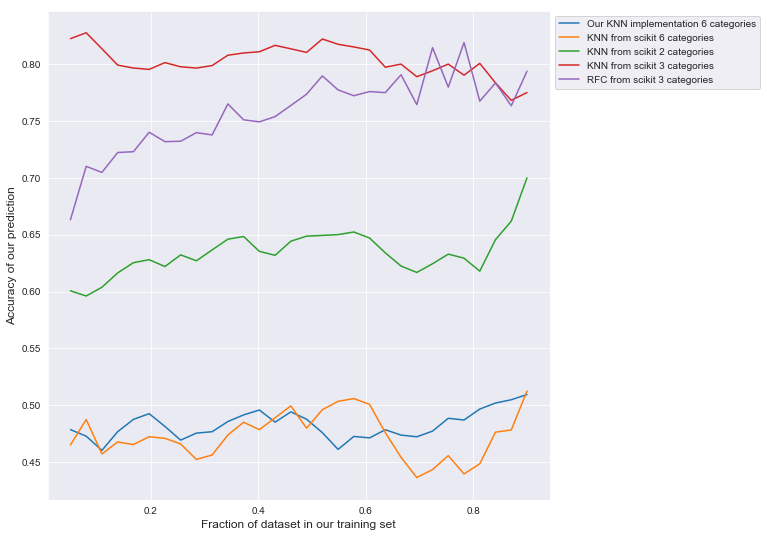

In [261]:


tr_sci_RFC3 = np.linspace(0.05, 0.9, 30)
accuracy_sci_RFC3 = np.zeros(len(tr_sci_RFC3))

for i, _f_ in enumerate(tr_sci_RFC3):
    X_train, X_test, y_3_train, y_3_test = train_test_split(
    X.values, y1.values, test_size=1-_f_, random_state=150
    )
    RFC = RandomForestClassifier()
    RFC.fit(X_train, y_3_train)
    
    accuracy_sci_RFC3[i] = RFC.score(X_test, y_3_test)
    
fig_training_frac_accuracy = plt.figure(figsize=(9, 9))


plt.plot(tr_our_KNN, accuracy_our_KNN,label="Our KNN implementation 6 categories")
plt.plot(tr_sci_KNN, accuracy_sci_6, label="KNN from scikit 6 categories")
plt.plot(tr_sci_KNN2, accuracy_sci_2, label="KNN from scikit 2 categories")
plt.plot(tr_sci_KNN3, accuracy_sci_3, label="KNN from scikit 3 categories")
plt.plot(tr_sci_RFC3, accuracy_sci_RFC3, label="RFC from scikit 3 categories")

plt.ylabel(r"Accuracy of our prediction", fontsize = 12)
plt.xlabel(r"Fraction of dataset in our training set", fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)

#plt.legend(fontsize=11)
plt.show()

#### We can see that K-Nearest Neighbor works pretty flat across all training sets where as RFC gets better as we increase the size of the training. 

#### Are there any parameters we can adjust to improve the acuracy of the Random Forest prediction ? 

In [262]:
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
grid_values = {'n_estimators':[50,100,200],'max_features':['auto','sqrt','log2'],'min_samples_leaf':[1,20,50,100],
'max_depth': [8, 9, 10, 11, 12],'random_state': [0,100]}
grid_RF = GridSearchCV(RFC,param_grid=grid_values,scoring='accuracy')
grid_RF.fit(X_train, y_3_train)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train, y_3_train)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 20, 50, 100], 'max_depth': [8, 9, 10, 11, 12], 'random_state': [0, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [263]:
grid_RF.best_params_

{'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 50,
 'random_state': 0}

#### we are going to use the parameters ( that are different to "by default") to help fine tune our algorithm 

#### Max depth = 12 and Estimators=50

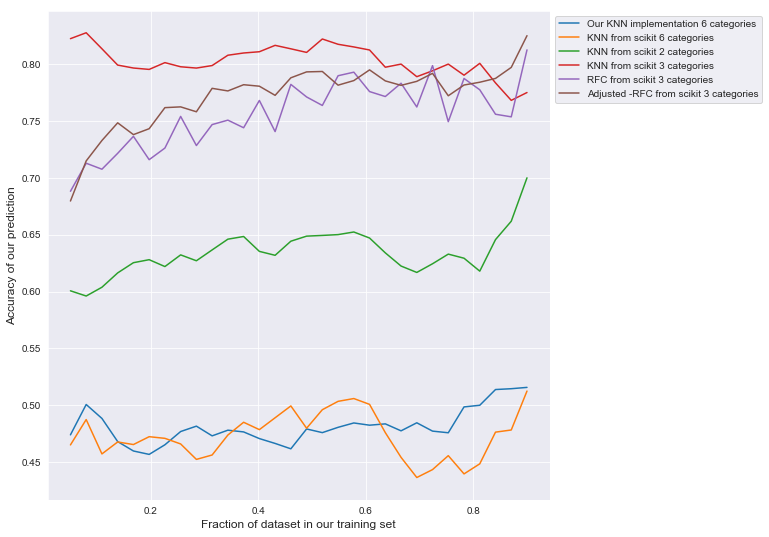

In [213]:


tr_sci_RFC3a = np.linspace(0.05, 0.9, 30)
accuracy_sci_RFC3a = np.zeros(len(tr_sci_RFC3a))

for i, _f_ in enumerate(tr_sci_RFC3a):
    X_train, X_test, y_3_train, y_3_test = train_test_split(
    X.values, y1.values, test_size=1-_f_, random_state=150
    )
    RFC = RandomForestClassifier(n_estimators=50, max_depth=12)
    RFC.fit(X_train, y_3_train)
    
    accuracy_sci_RFC3a[i] = RFC.score(X_test, y_3_test)
    
fig_training_frac_accuracy = plt.figure(figsize=(9, 9))


plt.plot(tr_our_KNN, accuracy_our_KNN,label="Our KNN implementation 6 categories")
plt.plot(tr_sci_KNN, accuracy_sci_6, label="KNN from scikit 6 categories")
plt.plot(tr_sci_KNN2, accuracy_sci_2, label="KNN from scikit 2 categories")
plt.plot(tr_sci_KNN3, accuracy_sci_3, label="KNN from scikit 3 categories")
plt.plot(tr_sci_RFC3, accuracy_sci_RFC3, label="RFC from scikit 3 categories")
plt.plot(tr_sci_RFC3a, accuracy_sci_RFC3a, label="Adjusted -RFC from scikit 3 categories")

plt.ylabel(r"Accuracy of our prediction", fontsize = 12)
plt.xlabel(r"Fraction of dataset in our training set", fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)

#plt.legend(fontsize=11)
plt.show()



#### As we can see in the line graph, our adjusted parameters make our Random Forest Prediction ( brown line ) a little  better and more stable, although KNN for 3 categories keeps being generally more accurate.


## Conclusion and Summary of Findings ¶ 


The goal of the project was to import, analyze the data sets and find and apply some algorithms to predict the quality of the wine. 

#### 1. Data Import 

The data set chosen was Red-Wine Quality. 

1599 entries in the data set, no nulls and 240 duplicates. 

12 features ( 1 of them the Quality that we needed to predict ) 

#### 2. Data Cleansing and Splitting the data into Testing and Training Process 


There data is originally distributed in 6 numerical categories ( 3,4,5,6,7,8). the distribution is not uniform accross the categories, with very few really bad wines and very few really good wines 


![Categories.png](./markdowns_midterm/Categories.png)


The data was analyzed using a correlation colored matrix to understand how much of a variable can be explained with the other variables  
The highest correlation with tHe variable of Quality was Alcohol and Volatile Acidity ( inversely) 

![Alcohol.png](./markdowns_midterm/Alcohol.png)![VolatileAcidity.png](./markdowns_midterm/VolatileAcidity.png)


The data was split into test and training sets  
The data was was also scaled using sci-kit learn 


#### 3. Algorithms 

The following Classifiers were used in the project:  


1. K-Nearest-Neighbours (using both code from lectures and code from scikit-learn) 
2. Logistic Regression (using scikit-learn) 
3. Random Forest ((using scikit-learn) 


#### 4. Prediction and Performance. 


I compared the accuracy of prediction between KNN using the lectures, KNN from scikit as well as Random Forest and Logistic Regression. 

I also compared the results categorizing the data choosing a binary label model ( Good Quality / Bad Quality ) and finally categorizing the data using 3 Different labels ( Excellent Quality / Average Quality / Poor Quality )  , which seems to be more aligned with the natural data distribution 
.

Finally, I used Grid Search method to look for the best parameters to fine tune my Random Forest algorithm and achieve a better and more stable model.  



Thank you! 
Silvia 


